## K-Means Nutrition Demo
#### Last updated: March 24, 2023

---

#### About this Demo  

This demo appears in the Clustering chapter of the book.  
It is not included as part of the course (but feel free to incorporate it).

#### About the Data

Nutrition Dataset from Kaggle  
Nutritional values for common foods and products  
Nutritional values for ~8.8k types of food  

Data download site  
https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products?resource=download

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Pathing (update to your system)

In [2]:
data_path = 'C:/Users/apt4c/Documents/book/intro_data_science/dataset/nutrition.csv'
data_path_clean = 'C:/Users/apt4c/Documents/book/intro_data_science/dataset/nutrition_clean.csv'
data_path_clean_scaled = 'C:/Users/apt4c/Documents/book/intro_data_science/dataset/nutrition_clean_scaled.csv'

#### Import data

In [3]:
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [4]:
print(df.columns)
print('records:', len(df))

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

#### Preprocessing

Specify initial columns for analysis

In [5]:
vars = ['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
         'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
         'vitamin_a', 'vitamin_a_rae', 'carotene_alpha']

# DROP
# serving_size - this is constant value across rows
# lucopene - value always zero

In [6]:
df = df[['name'] + vars]

# drop rows with any missing values
df = df.dropna(axis=0)

print('records:', len(df))
df.head()

records: 7199


,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha
1,"Nuts, pecans",691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg
3,"Teff, uncooked",367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg
4,"Sherbet, orange",144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg
5,"Cauliflower, raw",25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,0.507 mg,0.667 mg,0.060 mg,0.050 mg,0.00 IU,0.00 mcg,0.00 mcg
6,"Taro leaves, raw",42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,0.084 mg,0.456 mg,0.209 mg,4825.00 IU,241.00 mcg,0.00 mcg


Values contain units, which we need to drop (e.g., 40.5 mg) 

Regex matching: retain only numeric

In [7]:
for var in vars:
    print('extracting numeric from variable:', var)
    if not isinstance(df[var].values[0], np.int64):
        # retain numeric data
        df[var] = df[var].str.extract(r'([.|\d]+)')
        # convert strings to floats
        df[var] = df[var].values.astype(float)

extracting numeric from variable: calories
extracting numeric from variable: total_fat
extracting numeric from variable: saturated_fat
extracting numeric from variable: cholesterol
extracting numeric from variable: sodium
extracting numeric from variable: choline
extracting numeric from variable: folate
extracting numeric from variable: folic_acid
extracting numeric from variable: niacin
extracting numeric from variable: pantothenic_acid
extracting numeric from variable: riboflavin
extracting numeric from variable: thiamin
extracting numeric from variable: vitamin_a
extracting numeric from variable: vitamin_a_rae
extracting numeric from variable: carotene_alpha


In [8]:
df.to_csv(data_path_clean, index=False)

In [9]:
df.head()

,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha
1,"Nuts, pecans",691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0
3,"Teff, uncooked",367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0
4,"Sherbet, orange",144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0
5,"Cauliflower, raw",25,0.3,0.1,0.0,30.0,44.3,57.0,0.0,0.507,0.667,0.060,0.050,0.0,0.0,0.0
6,"Taro leaves, raw",42,0.7,0.2,0.0,3.0,12.8,126.0,0.0,1.513,0.084,0.456,0.209,4825.0,241.0,0.0


Normalize the predictors

In [10]:
# set up the scaler
scaler = StandardScaler()

# compute the z-scores, excluding name column from dataset
scaled_data = scaler.fit_transform(df.values[:,1:])

In [11]:
# save cleaned, scaled data
np.savetxt(data_path_clean_scaled, scaled_data, delimiter=",")

Select a subset of the data

In [12]:
food_subset = 175
scaled_data_sub = scaled_data[:food_subset]

####  Fit k-means

In [13]:
scores = []
inertia = []
rand = 314
clus_range = np.arange(2,10)
for clus in clus_range:
    print(f'fitting k-means for {clus} clusters')
    kmeans = KMeans(n_clusters=clus,
                    random_state=rand,
                    n_init=100).fit(scaled_data_sub)
    
    # extract inertia
    inertia.append(kmeans.inertia_)
    
    # compute silhouette scores
    scores.append(silhouette_score(scaled_data_sub,
                                   kmeans.labels_,
                                   metric='euclidean'))

scores

fitting k-means for 2 clusters
fitting k-means for 3 clusters
fitting k-means for 4 clusters
fitting k-means for 5 clusters
fitting k-means for 6 clusters
fitting k-means for 7 clusters
fitting k-means for 8 clusters
fitting k-means for 9 clusters


[0.6122439758834131,
 0.6285085390446494,
 0.6047246738486439,
 0.21044603960345426,
 0.3961517593807673,
 0.20552568117633094,
 0.21174425767225863,
 0.22244019835562134]

#### Plot WSSE vs k

A common choice of $k$ is at the formation of an elbow in the graph.

Text(0, 0.5, 'WSSE')

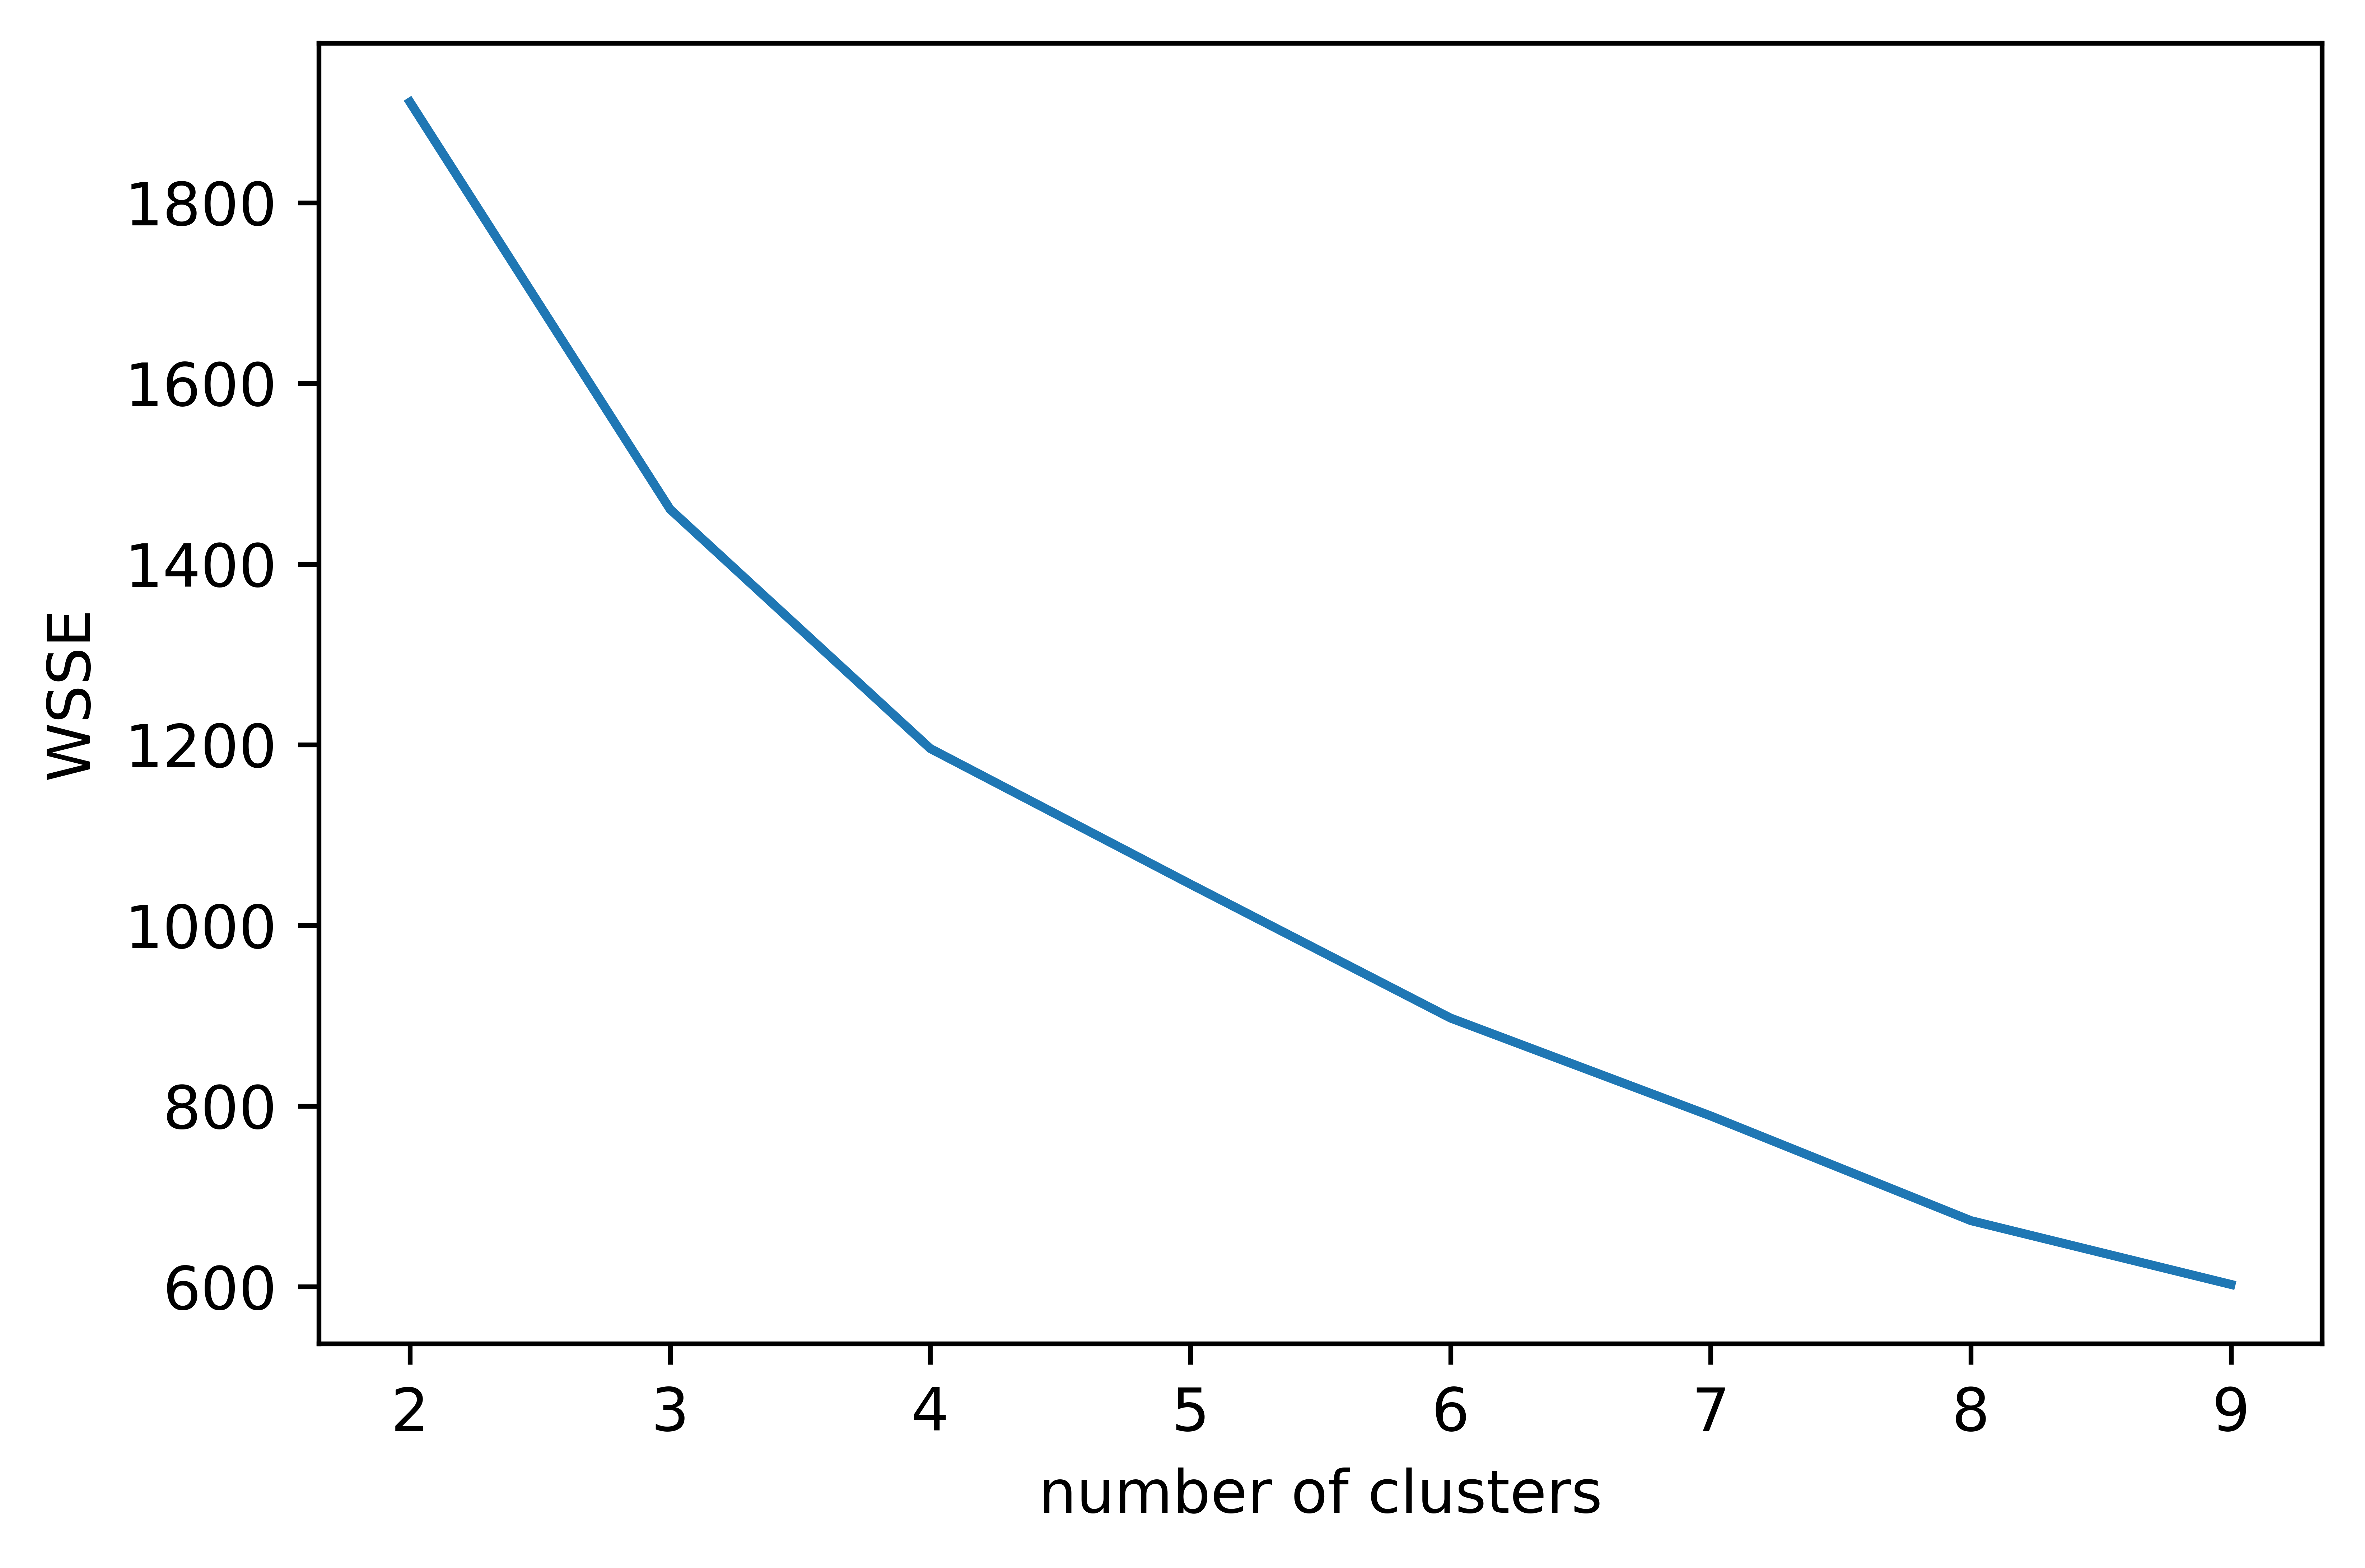

In [15]:
plt.figure(dpi=1200) 
plt.plot(clus_range, inertia)
plt.xlabel('number of clusters')
plt.ylabel('WSSE')

#### Plot Silhouette scores

Selecting $k$ based on the the maximum silhouette score is a more quantitative approach. 

Text(0, 0.5, 'silhouette score')

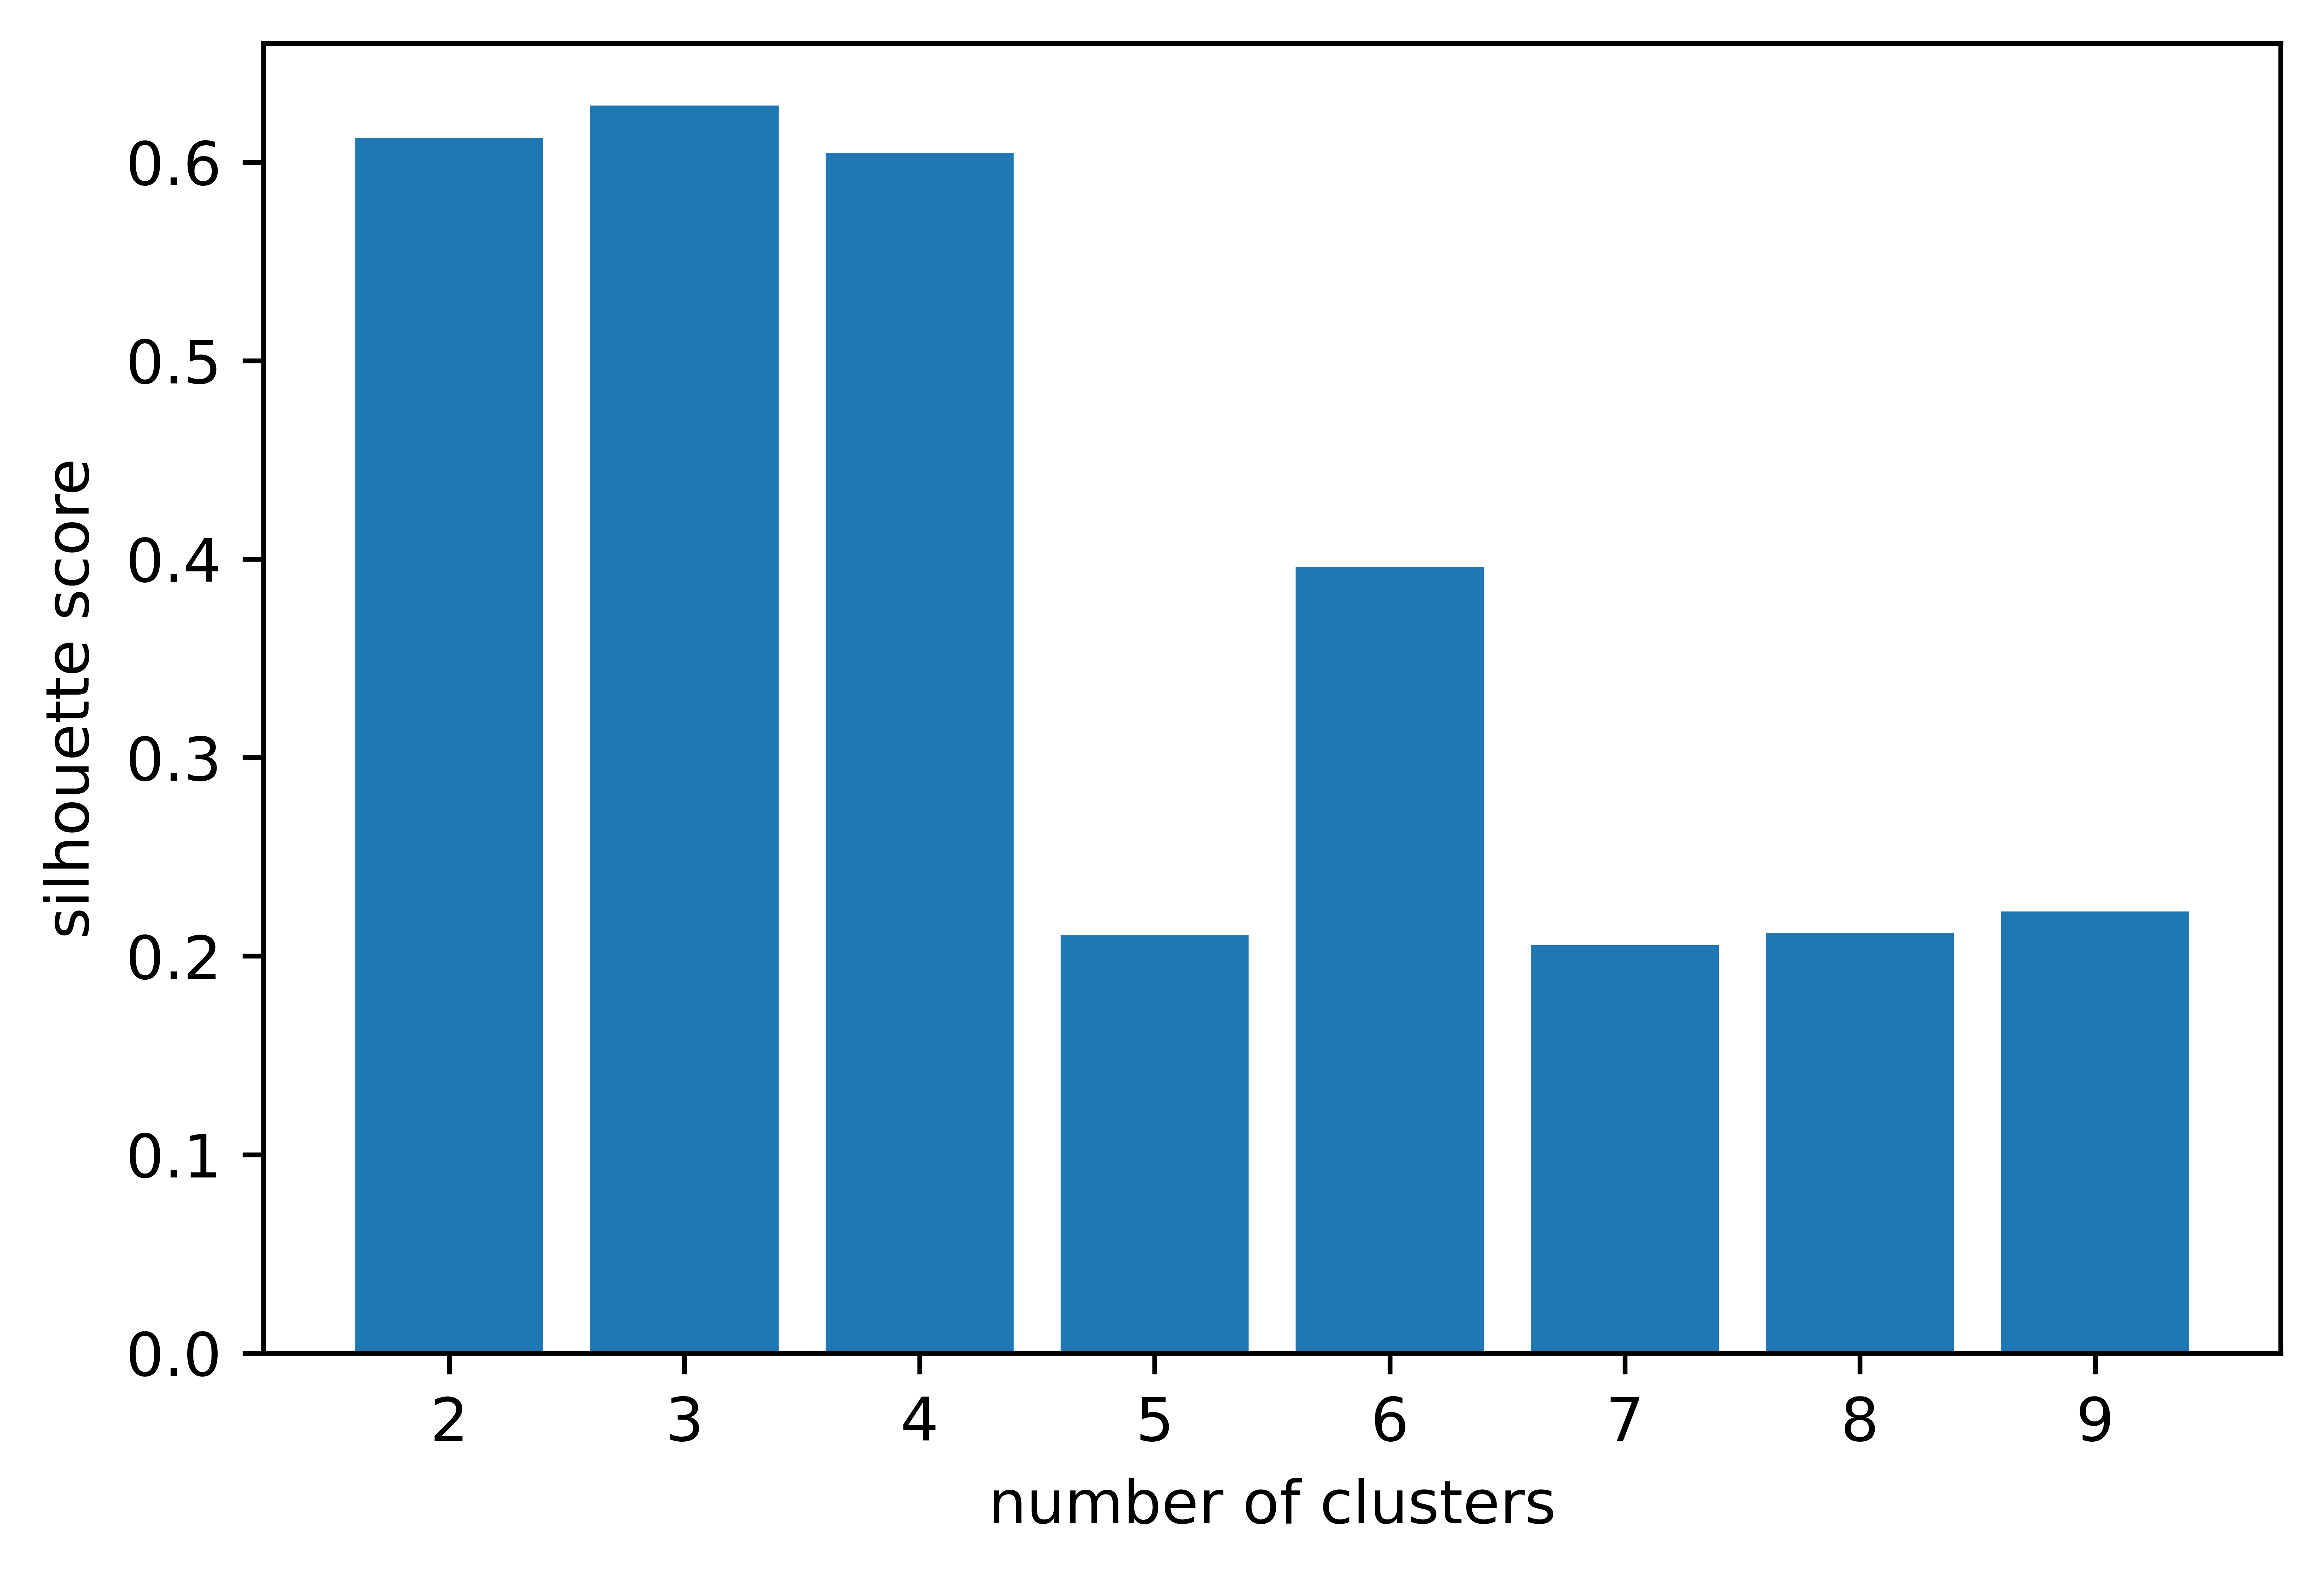

In [16]:
plt.figure(dpi=1200) 
plt.bar(clus_range, scores)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')

#### Run final k-means with best cluster number

In [17]:
# k with largest score
k_best = clus_range[np.argmax(scores)]

kmeans_final = KMeans(n_clusters=k_best, random_state=rand, n_init=100).fit(scaled_data_sub)
labels = kmeans_final.labels_

#### Build final dataframe

In [18]:
# for columns: retain name and predictor subset
df_sub = df[['name']+vars].iloc[:food_subset]

# append the cluster labels
df_sub['cluster'] = labels
df_sub.head()

,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,cluster
1,"Nuts, pecans",691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,1
3,"Teff, uncooked",367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,0
4,"Sherbet, orange",144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,0
5,"Cauliflower, raw",25,0.3,0.1,0.0,30.0,44.3,57.0,0.0,0.507,0.667,0.060,0.050,0.0,0.0,0.0,0
6,"Taro leaves, raw",42,0.7,0.2,0.0,3.0,12.8,126.0,0.0,1.513,0.084,0.456,0.209,4825.0,241.0,0.0,0


#### Calculate statistics by Cluster

In [19]:
# Compute mean of each column broken out by cluster
df_sub.groupby(df_sub.cluster).agg(func=np.mean).round(3)

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha
cluster,,,,,,,,,,,,,,,
0,245.111,9.659,2.738,23.377,399.056,19.430,50.253,6.654,3.026,0.551,0.229,0.220,807.586,70.988,11.093
1,721.091,78.273,27.909,141.455,6.545,120.827,25.364,0.000,0.623,0.490,0.094,0.200,656.273,174.091,6.364
2,296.500,8.750,1.550,0.000,1468.500,33.250,68.000,0.000,8.750,1.497,1.220,0.575,48975.000,2449.000,1045.000


In [20]:
df_sub['name'].groupby(df_sub.cluster).agg(func=len)

cluster
0    162
1     11
2      2
Name: name, dtype: int64

#### Show boxplots by cluster to understand full distributions

<AxesSubplot:xlabel='cluster', ylabel='calories'>

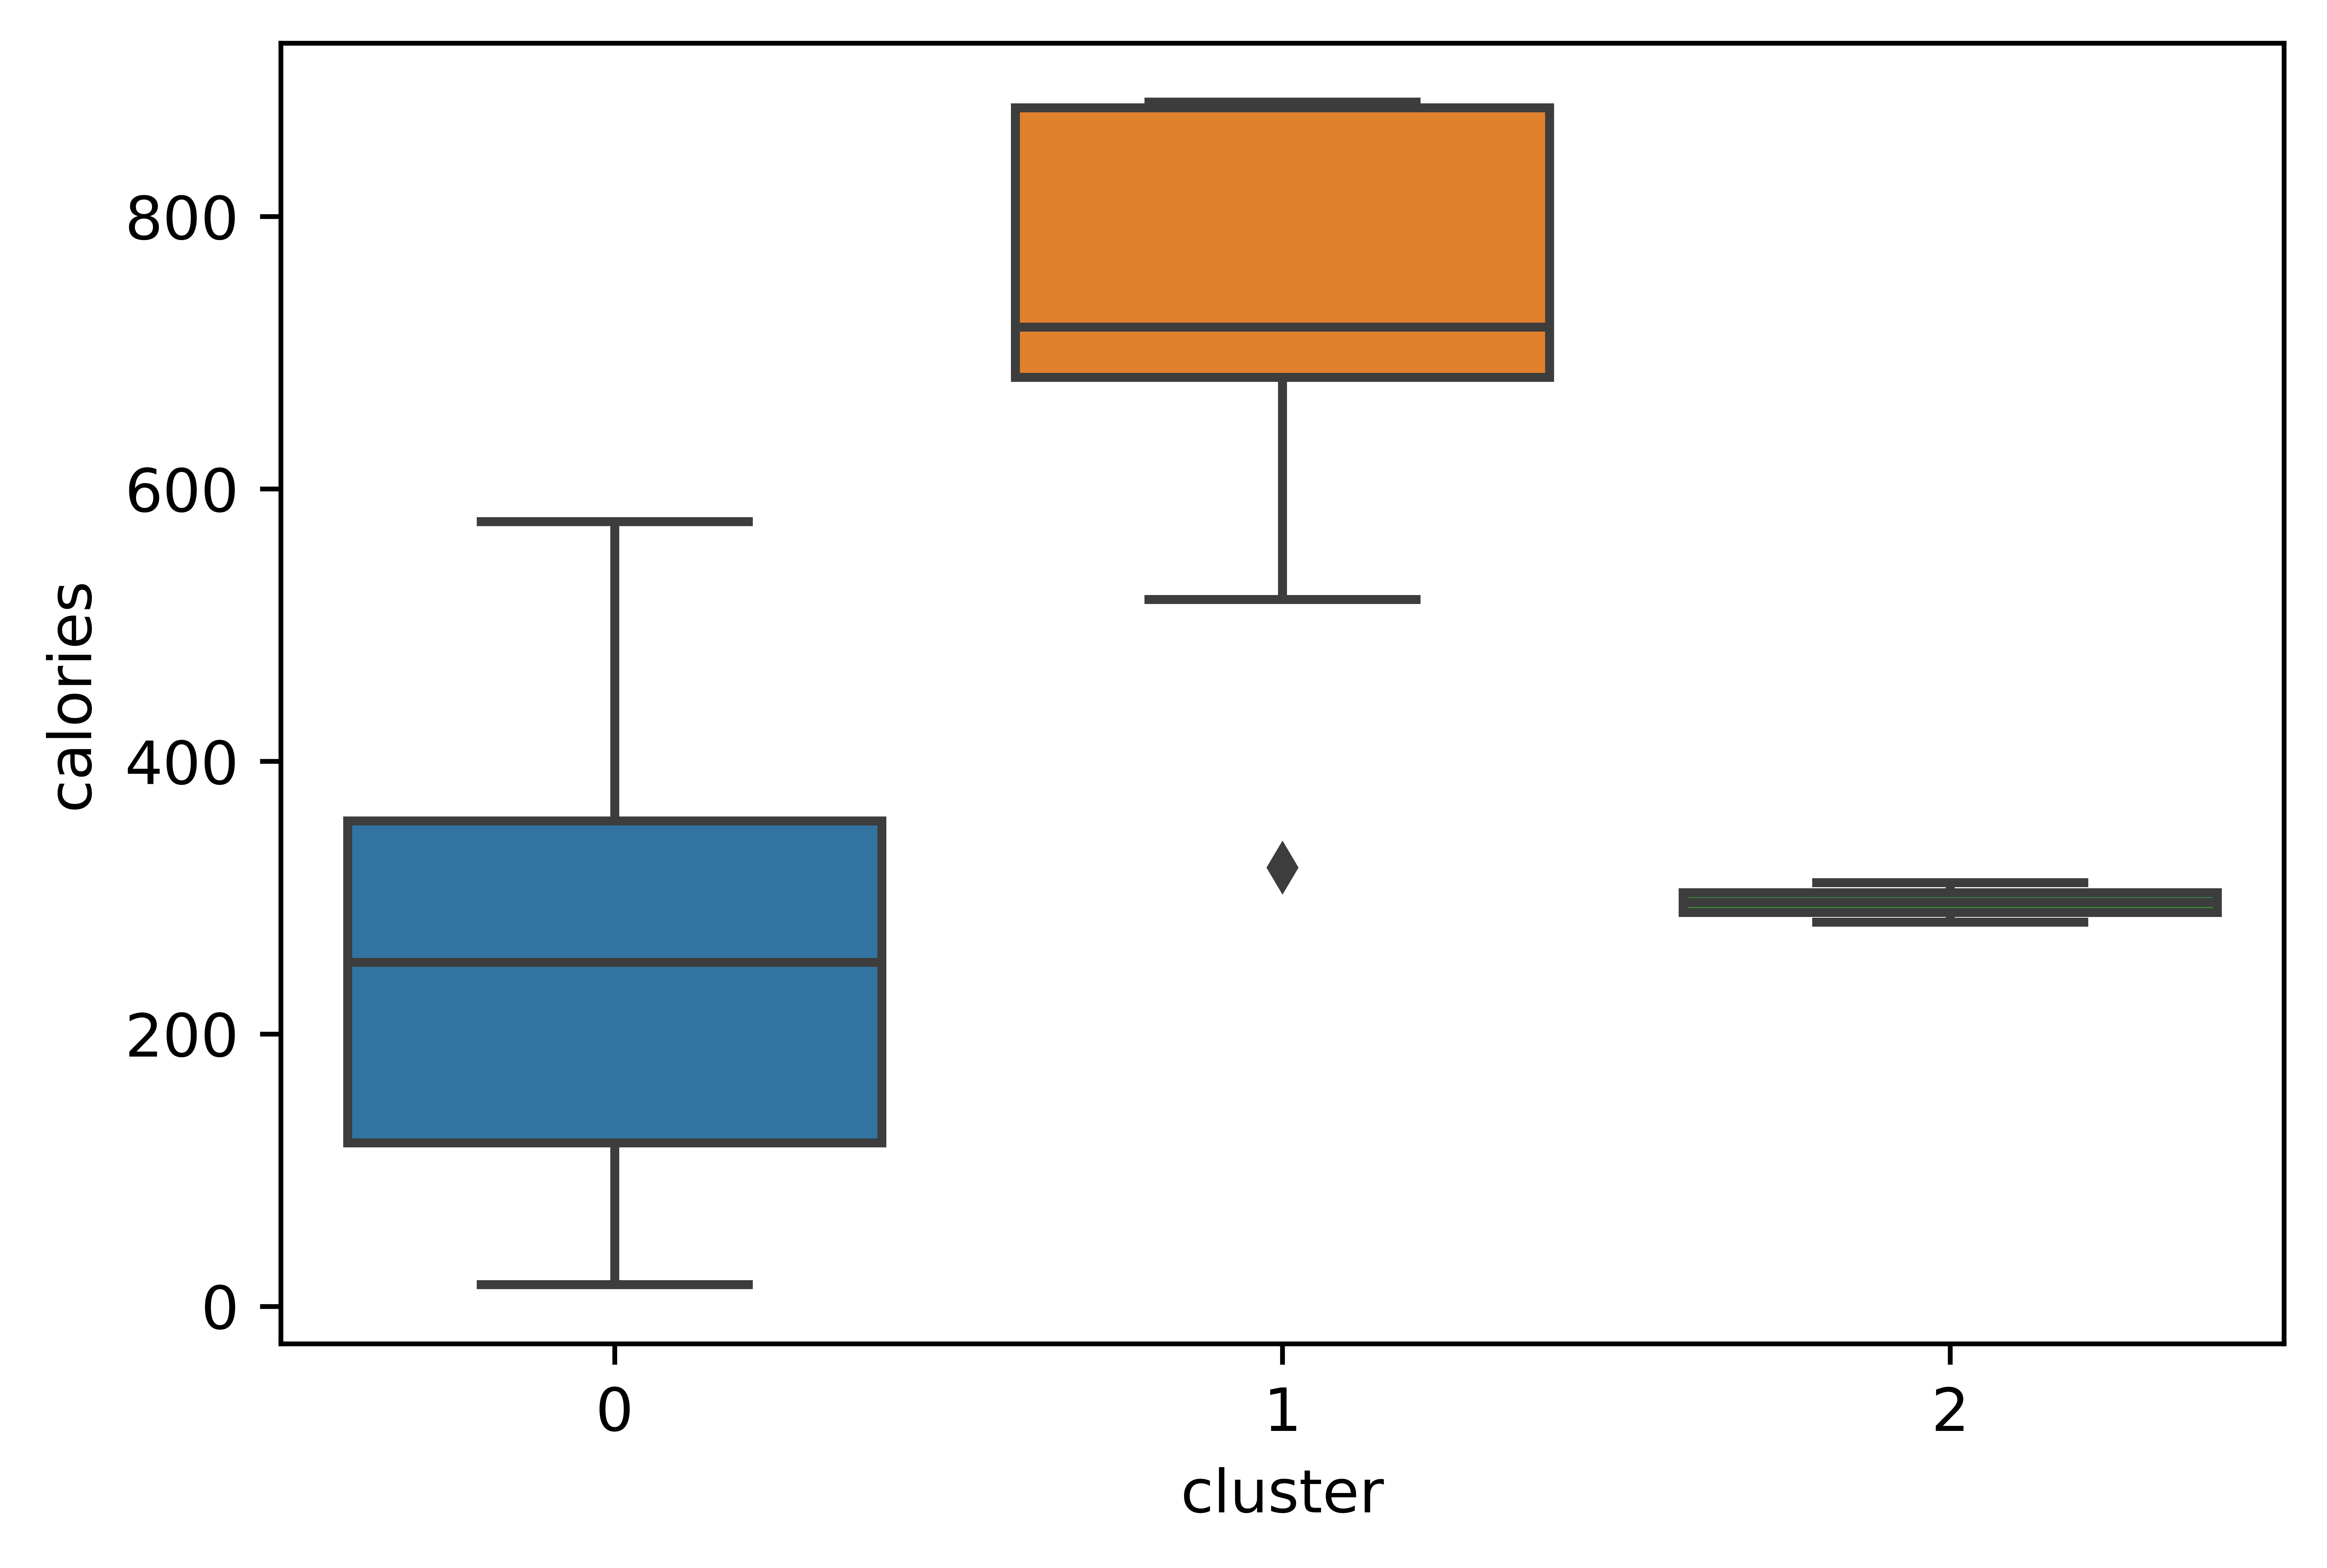

In [21]:
plt.figure(dpi=1200) 
sns.boxplot(x='cluster',y='calories',data=df_sub)

<AxesSubplot:xlabel='cluster', ylabel='total_fat'>

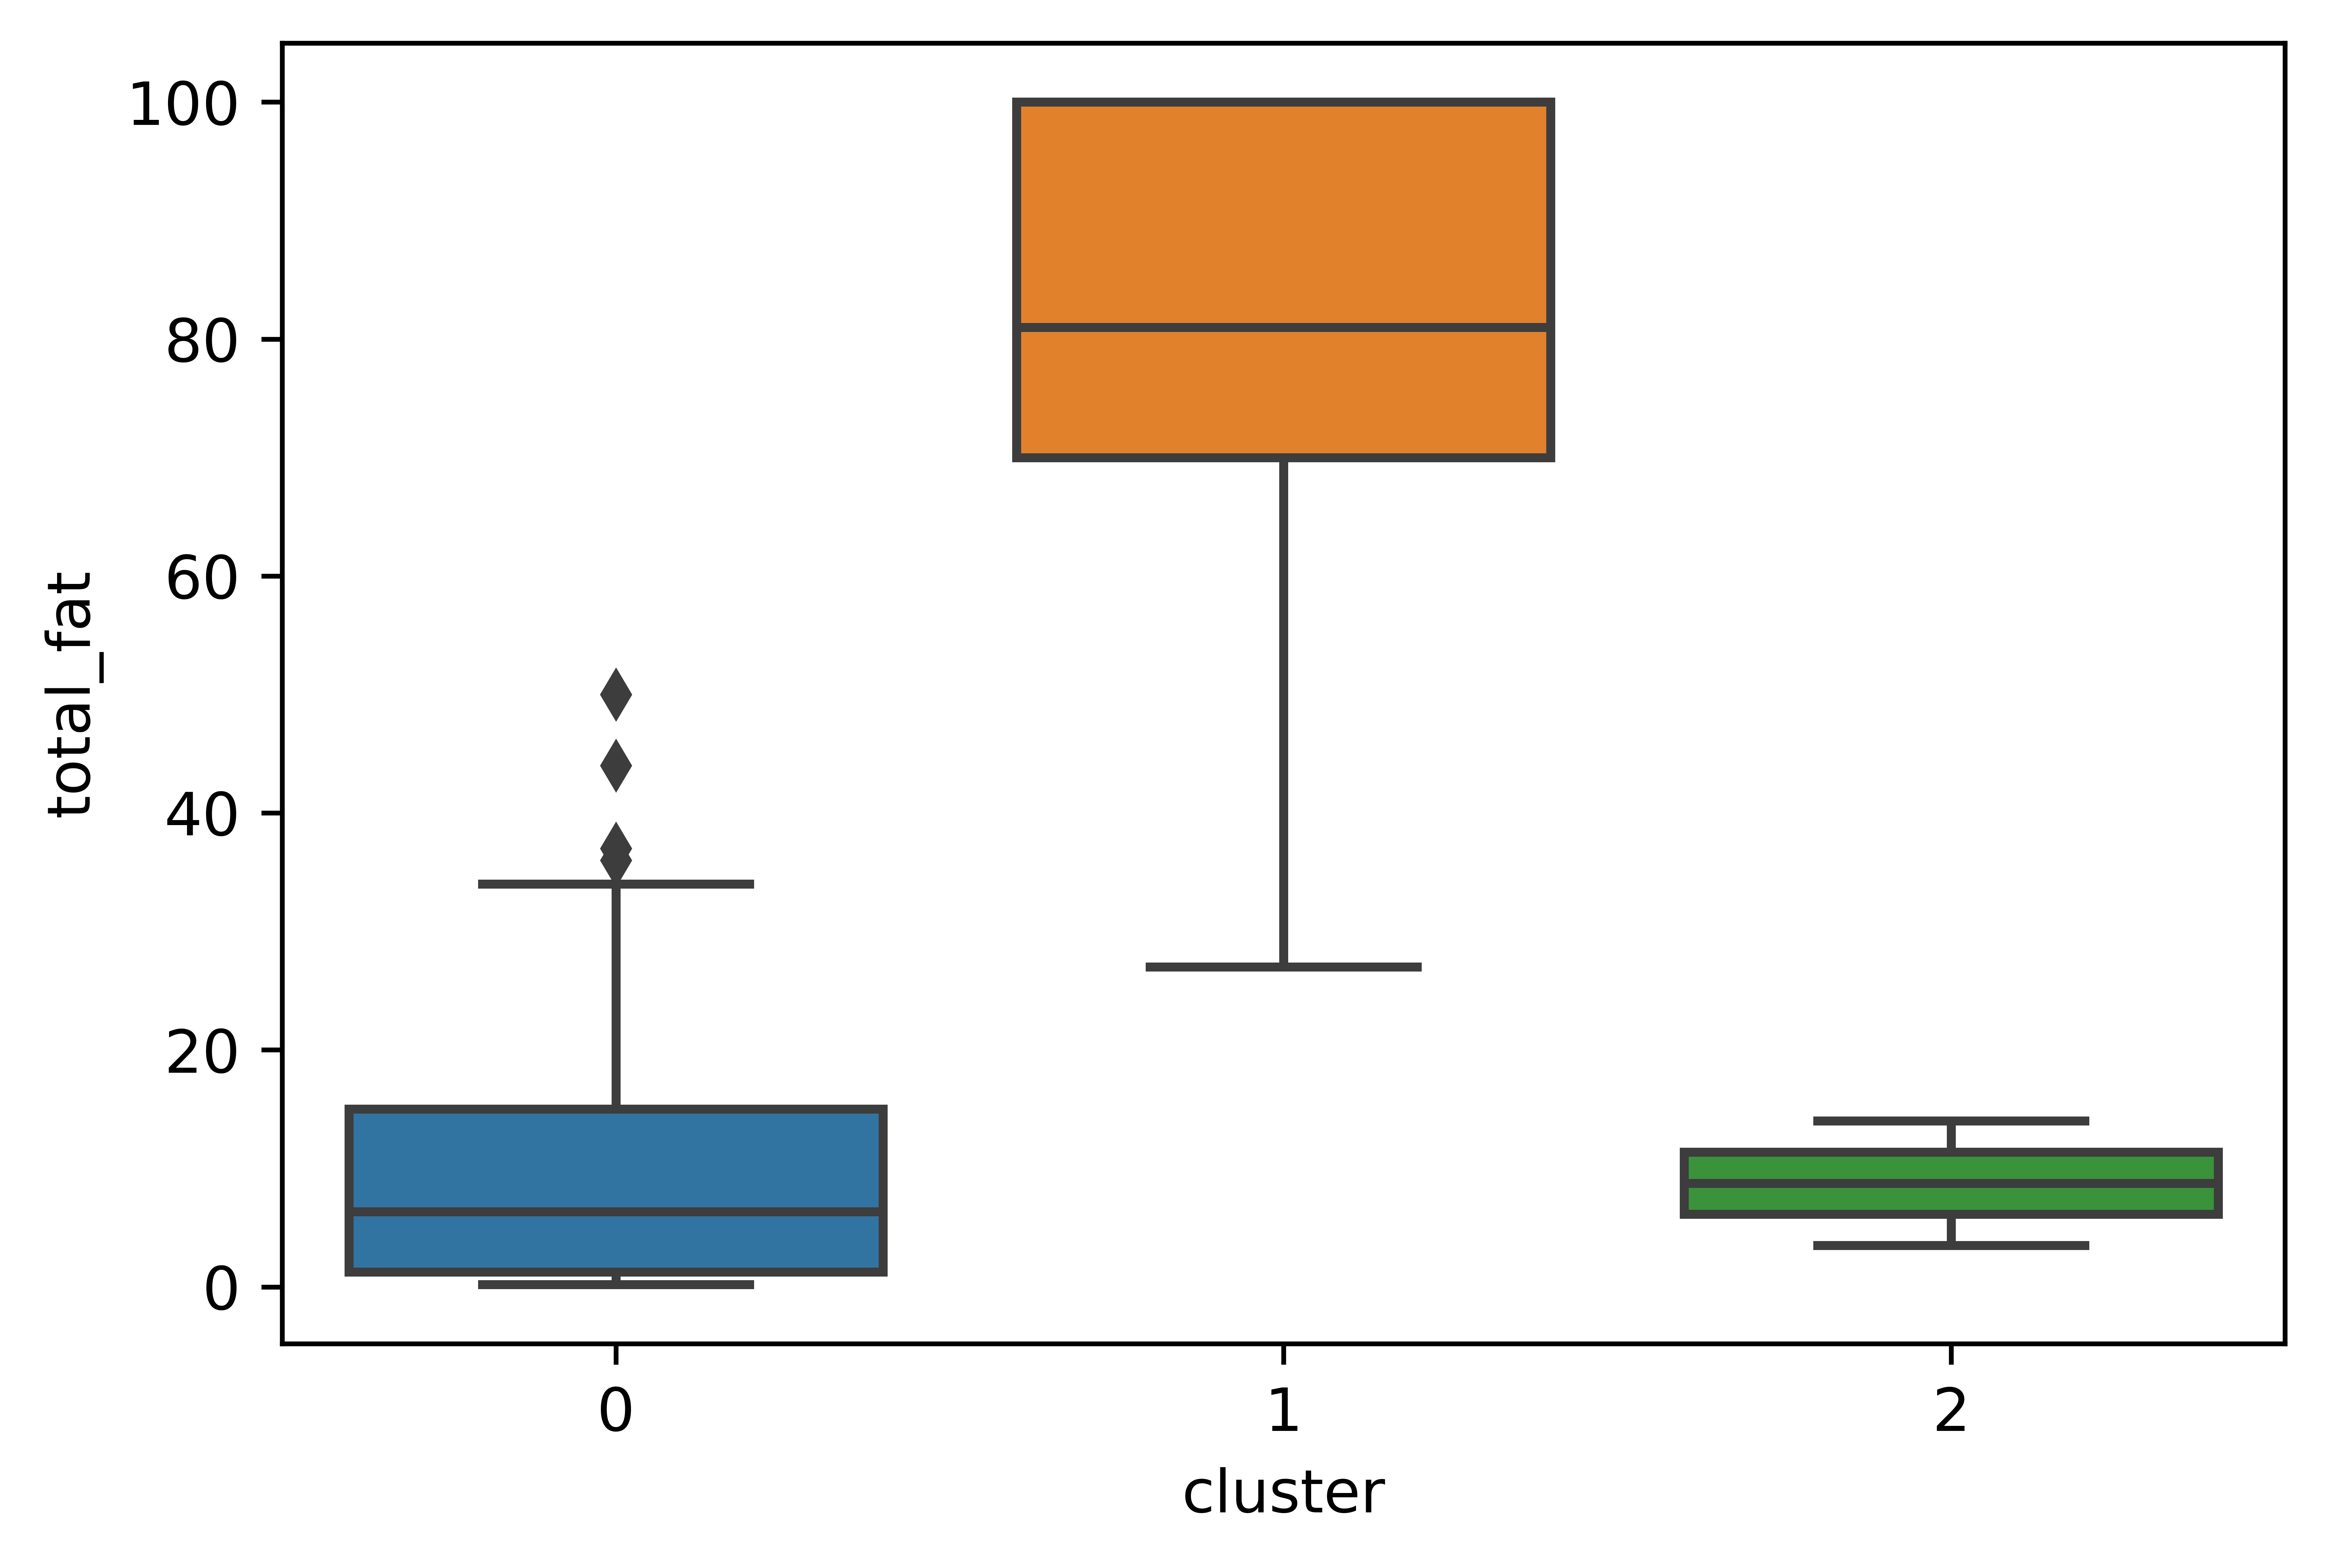

In [22]:
plt.figure(dpi=1200) 
sns.boxplot(x='cluster',y='total_fat',data=df_sub)

#### Show the foods in each cluster

In [17]:
pd.set_option('display.max_rows', None)

for clus in np.arange(k_best):
    print(f'cluster {clus}')
    print(df_sub.name[df_sub.cluster==clus])
    print('')

cluster 0
3              Teff, uncooked
4             Sherbet, orange
5            Cauliflower, raw
6            Taro leaves, raw
7           Lamb, raw, ground
8           Cheese, camembert
9          Vegetarian fillets
13       Crackers, rusk toast
14      Chicken, boiled, feet
15      Quail, raw, meat only
16     Pie, lemon, fried pies
17     Peppers, raw, jalapeno
18     Winged bean tuber, raw
19     Salami, turkey, cooked
21     Nuts, raw, ginkgo nuts
22     Spices, ground, savory
23     Candies, sesame crunch
24     Cheese, low fat, cream
27     Ostrich, raw, top loin
28     Chewing gum, sugarless
30     Pasta, unenriched, dry
32     Cookies, Marie biscuit
33     Broccoli, raw, chinese
34     McDONALD'S, Hash Brown
36     Emu, raw, outside drum
37     Nuts, dried, beechnuts
39     Lentils, raw, sprouted
40     Gravy, mix, dry, onion
41     Pie, fruit, fried pies
42     Snacks, cakes, popcorn
43     Snack, Mixed Berry Bar
44      Fish, raw, sheepshead
46      Brussels sprouts, raw
